# Assignment_12_Decision_Tree (Fraudcheck)

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd

In [2]:
Fraud_C = pd.read_csv("D:\Data Science\Assignments\Fraud_check.csv")
Fraud_C.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
tax_inc = []
for i in Fraud_C['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
Fraud_C['tax_inc'] = tax_inc

In [4]:
Fraud_C.columns  # check repeated columns names

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [5]:
Fraud_C.drop('Taxable.Income', axis = 1, inplace = True)  # drop repeated column
Fraud_C.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [6]:
Fraud_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [7]:
Fraud_C.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [8]:
Fraud_C.isna().sum()   # Checking null values

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_inc            0
dtype: int64

In [9]:
Fraud_C[Fraud_C.duplicated()]   # Checking duplicate columns

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc


In [10]:
print(Fraud_C['Undergrad'].value_counts())
print(Fraud_C['Marital.Status'].value_counts())
print(Fraud_C['Urban'].value_counts())
print(Fraud_C['tax_inc'].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_inc, dtype: int64


In [11]:
print(Fraud_C['Undergrad'].unique())
print(Fraud_C['Marital.Status'].unique())
print(Fraud_C['Urban'].unique())
print(Fraud_C['tax_inc'].unique())

['NO' 'YES']
['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [12]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Fraud_C['Undergrad'] = LE.fit_transform(Fraud_C['Undergrad'])
Fraud_C['Marital.Status'] = LE.fit_transform(Fraud_C['Marital.Status'])
Fraud_C['Urban'] = LE.fit_transform(Fraud_C['Urban'])
Fraud_C['tax_inc'] = LE.fit_transform(Fraud_C['tax_inc'])

In [13]:
Fraud_C.info()   # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   tax_inc          600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [14]:
Fraud_C.corr()   # Finding correlation

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_inc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


# Visualization

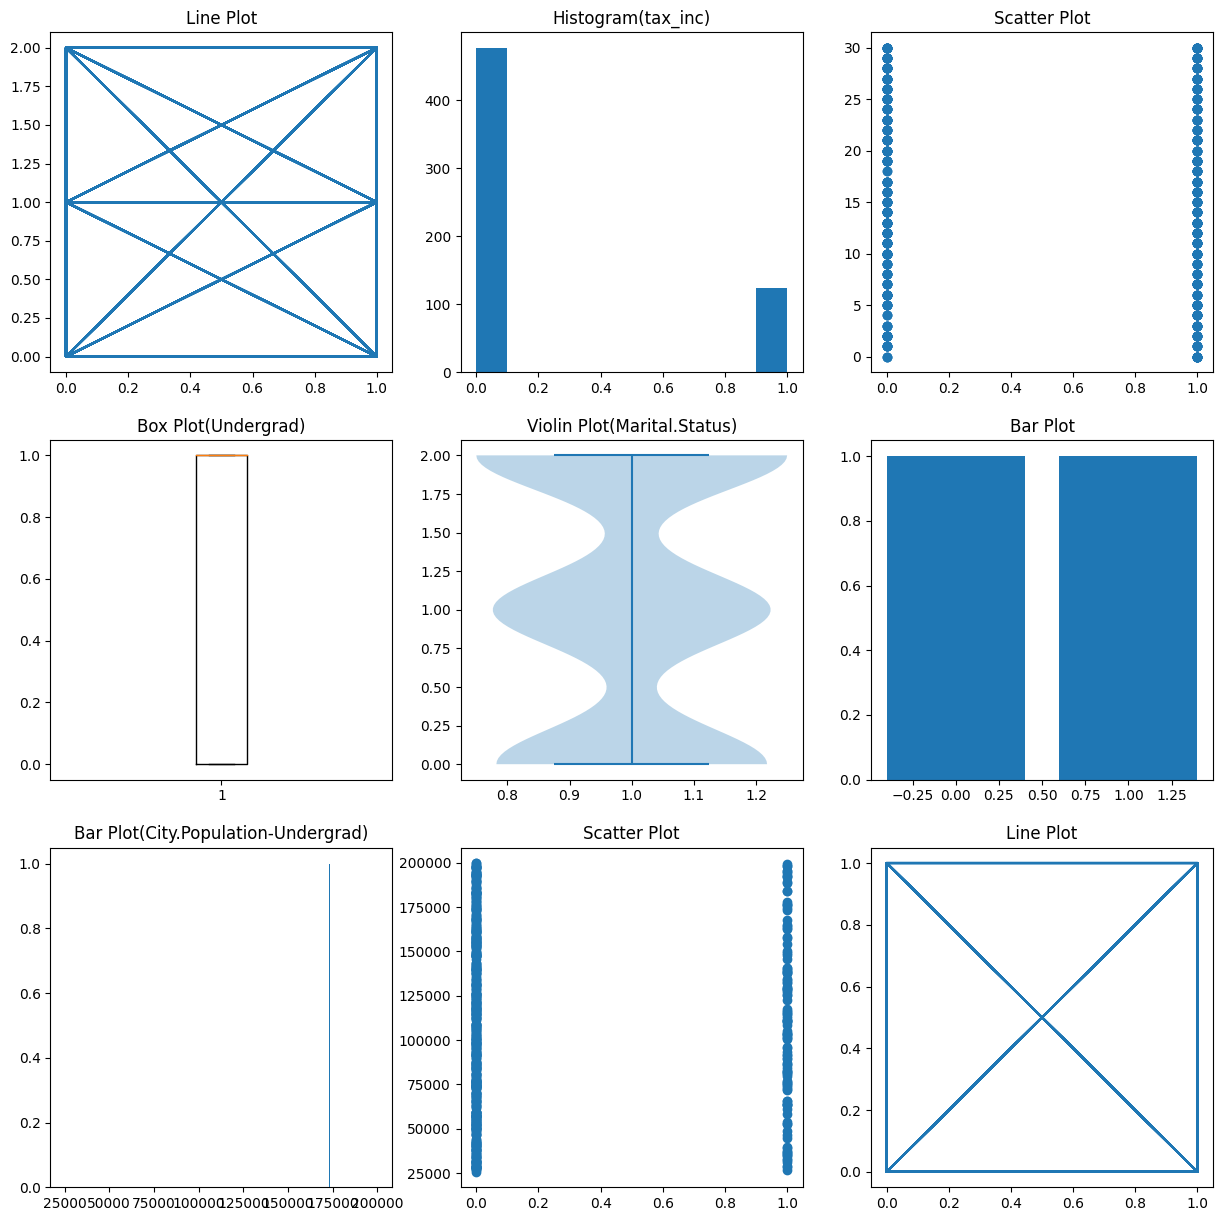

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('Undergrad','Marital.Status', data = Fraud_C);ax[0,0].set_title("Line Plot")
ax[0,1].hist('tax_inc', data = Fraud_C);ax[0,1].set_title("Histogram(tax_inc)")
ax[0,2].scatter('Urban', 'Work.Experience', data = Fraud_C);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('Undergrad', data = Fraud_C);ax[1,0].set_title("Box Plot(Undergrad)")
ax[1,1].violinplot('Marital.Status', data = Fraud_C);ax[1,1].set_title("Violin Plot(Marital.Status)")
ax[1,2].bar('Urban','Undergrad', data = Fraud_C);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(Fraud_C['City.Population'], Fraud_C["Undergrad"]);ax[2,0].set_title("Bar Plot(City.Population-Undergrad)")
ax[2,1].scatter('tax_inc','City.Population', data = Fraud_C);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('Undergrad','tax_inc', data = Fraud_C);ax[2,2].set_title("Line Plot")
plt.show()

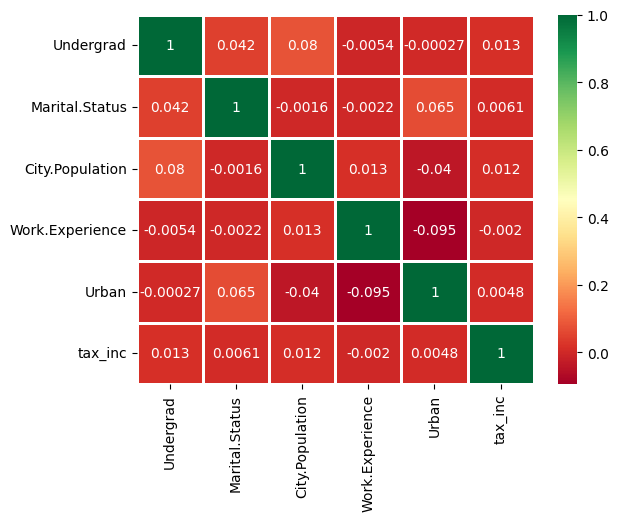

In [16]:
sns.heatmap(Fraud_C.corr(), cmap = "RdYlGn", annot = True, linewidth = 1)   # annot= True for label the values
plt.show()

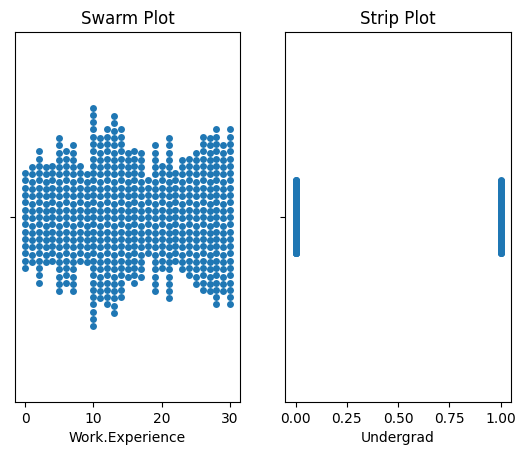

In [34]:
plt.subplot(1,2,1)
sns.swarmplot(x='Work.Experience', data = Fraud_C);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot(x= 'Undergrad', data = Fraud_C);plt.title("Strip Plot")
plt.show()

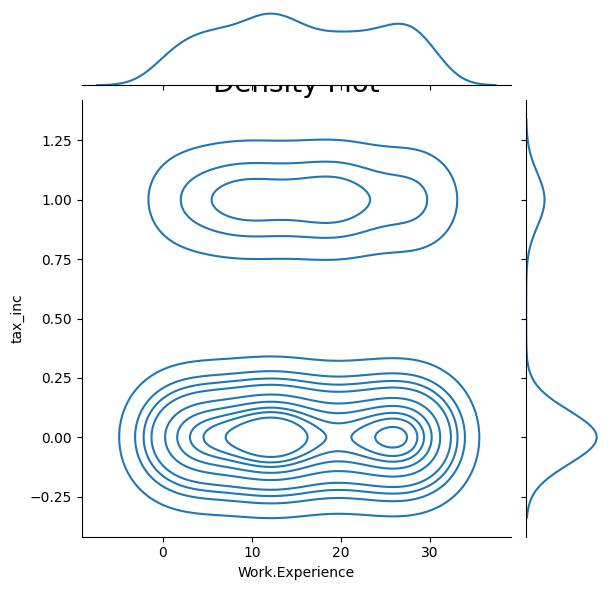

In [35]:
sns.jointplot(x='Work.Experience',y="tax_inc", data = Fraud_C, kind= 'kde')
plt.title("Density Plot", size = 20)
plt.show()

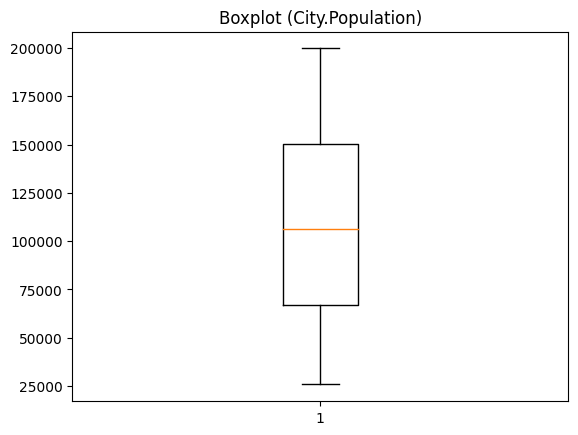

In [28]:
# Boxplot for outlier detection
plt.boxplot(Fraud_C['City.Population']); plt.title("Boxplot (City.Population)")
plt.show()

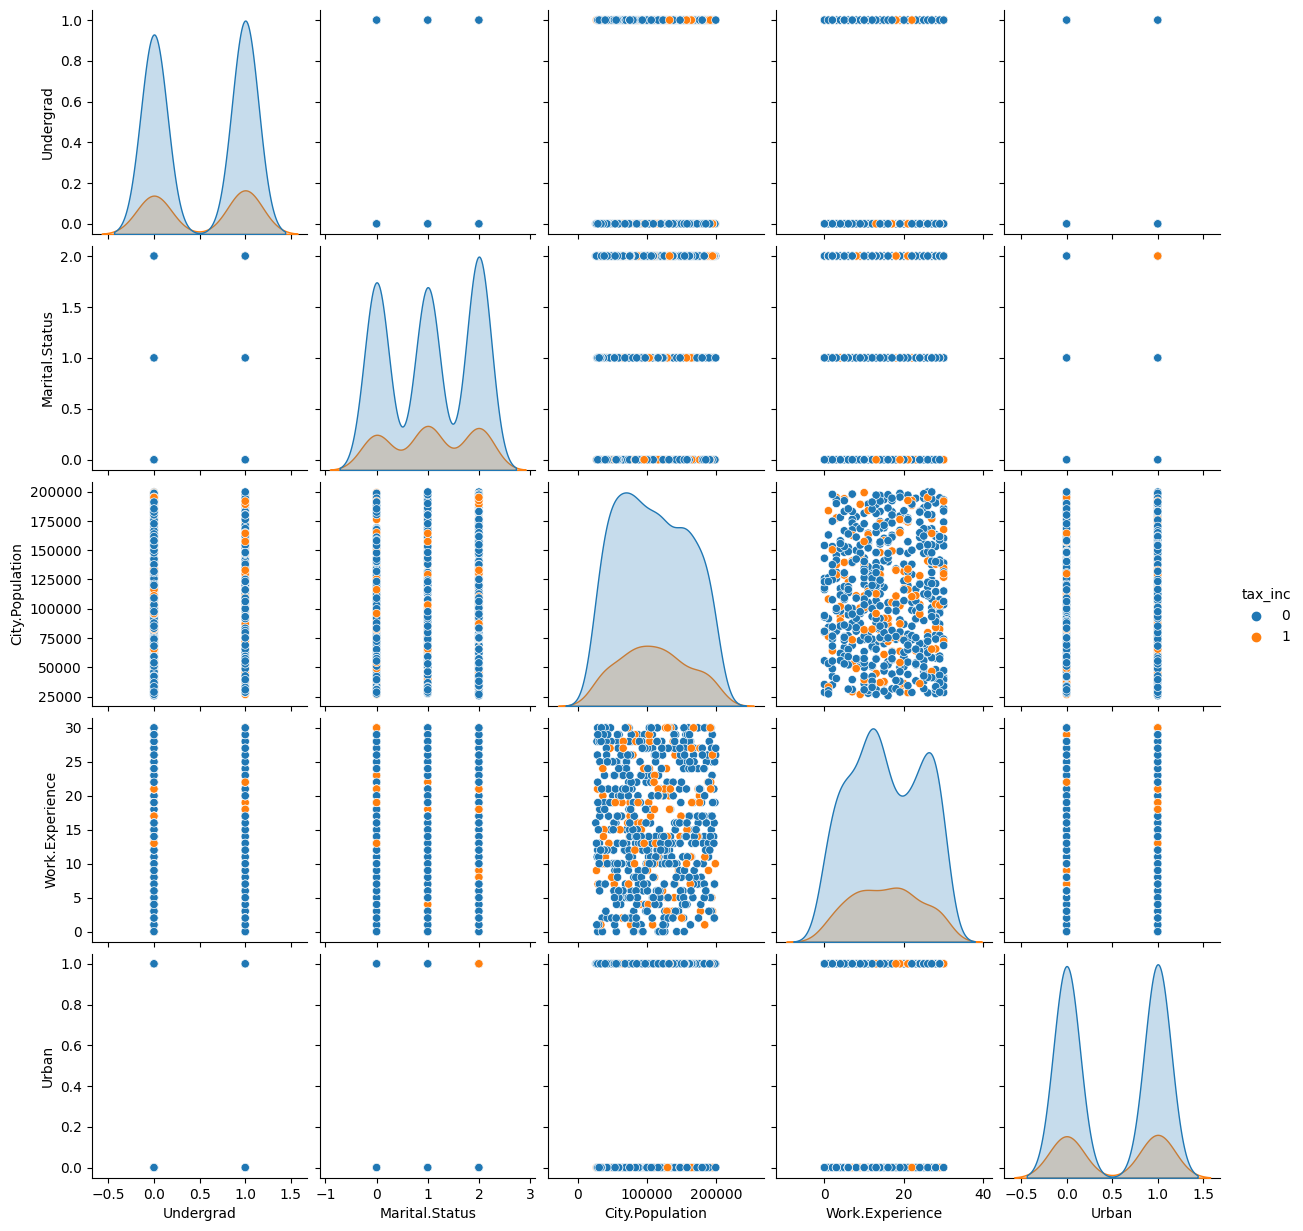

In [29]:
# Plotting pairplot for visualize all the attributes in one plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Fraud_C, hue = 'tax_inc')
plt.show()

# Model Building , Training and Testing

In [30]:
x = Fraud_C.iloc[:,:-1]
y = Fraud_C.iloc[:,-1]
print(x)
print(y)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_inc

In [31]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

In [ ]:
model

In [ ]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
y_train.value_counts().keys()

In [ ]:
Fraud_C.columns

In [ ]:
Fraud_C['tax_inc'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [ ]:
# Predicting on test data
preds = model.predict(x_test)     # predicting on test data set
pd.Series(preds).value_counts()    # Getting the count of each category

In [ ]:
y_test.value_counts()

In [ ]:
preds

In [ ]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions.

In [ ]:
preds, y_test

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
model_gini.fit(x_train, y_train)

In [ ]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

# Decision Tree Regression Example

In [ ]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = Fraud_C.values
X = array[:,:-1]
Y = array[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

In [ ]:
# Find The accuracy
model.score(X_test, Y_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

In [ ]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [ ]:
y_pred_Fraud_C = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_Fraud_C

In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

In [ ]:
((476+0)/(476+0+124+0))*100

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
auc    # Accuracy

# KNN Classification

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kfold = KFold(n_splits = 10)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())

In [ ]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

In [ ]:
print(grid.best_score_)

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Take a sample of data set for training and testing.
X, Y = Fraud_C.iloc[:100,:-1], Fraud_C.iloc[:100,-1]

In [ ]:
Fraud_C.info()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# SVMC = SVC(random_state=42)

# svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
#                   'gamma': [1, 0.1, 0.01, 0.001],
#                   'C': [1000, 100, 10, 1],
#                   'tol':[0.001,0.0008,0.0009,0.0011]}

# gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

# gsSVMC.fit(x_train,y_train)

# svm_best = gsSVMC.best_estimator_

# gsSVMC.best_score_

In [ ]:
#  Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(x_train, y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy is: ", acc)
confusion_matrix(y_test, y_pred)